#Zadanie 1a (3 pkt)
Celem zadania jest rozwiązanie problemu plecakowego dwoma metodami - brute force oraz według zadanej heurystyki. Należy zaimplementować metody klasy *KnapSack* - *solve_knapsack_brute_force* oraz *solve_knapsack_pw_ratio*. Poprzez rozwiązanie problemu rozumiemy podanie które przedmioty (indeksy w tablicy) należy spakować do plecaka oraz jaka jest sumaryczna wartość i masa plecaka. Punktacja wygląda następująco:


*   Rozwiązanie problemu metodą brute force. *Podpowiedź: do wygenerowania wszystkich permutacji można użyć funkcji product z biblioteki itertools* - **1.5 pkt**
*   Rozwiązanie problemu według heurystyki - do plecaka pakujemy przedmioty według stosunku wartości do wagi - **1 pkt**
*   Dla metody brute force proszę wygenerować wykres zależności czasu wykonywania metody od liczby elementów w tablicach *weights* i *profits* (do obu tablic należy stopniowo dopisywać po jednym elemencie, np. 10-krotnie, wartości elementów nie mają znaczenia). Proszę również odpowiedzieć na pytania (w osobnej komórce tekstowej) - czy obie metody mają takie same rozwiązania? Jakie są Pani / Pana wnioski? - **0.5 pkt**




In [3]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import random
import time

In [4]:
weights = np.array([8, 3, 5, 2])
capacity = 9
profits = np.array([16, 8, 9, 6])

In [5]:
class KnapSack:
  def __init__(self, profits, weights, capacity):
    self.profits = profits
    self.weights = weights
    self.capacity = capacity

  def solve_knapsack_brute_force(self):
    max_profit = 0
    max_weights = []
    max_profits = []
    for i in range(1, len(self.weights)):
      weights_c = itertools.combinations(self.weights, i)
      profits_c = itertools.combinations(self.profits, i)
      for w, p in zip(weights_c, profits_c):
        if sum(w) <= self.capacity:
          profit = sum(p)
          if profit> max_profit:
            max_profit = profit
            max_weights = list(w)
            max_profits = list(p)

    return (max_weights, max_profits)

  def solve_knapsack_pw_ratio(self):
    ratios = profits/weights
    max_weights = []
    max_profits = []
    zipped_lists = sorted(zip(ratios, weights, profits), reverse = True)
    common_weight = 0
    for r, w, p in zipped_lists:
      if common_weight + w < capacity:
        common_weight += w
        max_weights.append(w)
        max_profits.append(p)
    return (max_weights, max_profits)

In [11]:
backpack = KnapSack(profits, weights, capacity)
w,p = backpack.solve_knapsack_brute_force()

i = 1
for waga, profit in zip(w,p):
    print(f'przedmiot {i}, waga = {waga}, profit = {profit}')
    i+=1

przedmiot 1, waga = 3, profit = 8
przedmiot 2, waga = 5, profit = 9


In [13]:
w,p = backpack.solve_knapsack_pw_ratio()

i = 1
for waga, profit in zip(w,p):
    print(f'przedmiot {i}, waga = {waga}, profit = {profit}')
    i+=1

przedmiot 1, waga = 2, profit = 6
przedmiot 2, waga = 3, profit = 8


##Wykres zależności od czasu dla metody brute force

In [8]:
REPS = 25
random_weights = list(range(REPS))
random_profits = list(range(REPS))
random.shuffle(random_weights)
random.shuffle(random_profits)
execution_times = list()

for i in range(len(random_weights)):
  random_backpack = KnapSack(random_profits[:i], random_weights[:i],
                             random.randint(5, 20))
  start = time.time()
  random_backpack.solve_knapsack_brute_force()
  end = time.time()
  execution_times.append(end-start)




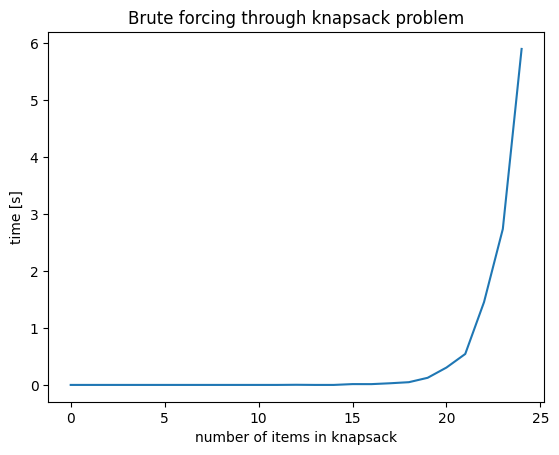

In [9]:
fig, ax = plt.subplots()
ax.plot(np.arange(REPS), execution_times)

ax.set(xlabel='number of items in knapsack', ylabel='time [s]',
       title='Brute forcing through knapsack problem')

plt.show()

##Wnioski
Metoda typu brute force jest skuteczna, ponieważ sprawdza każdy możliwy przypadek, natomiast wiąże się do z dużymi kosztami bo złożoność obliczeniowa wynosi O(2^n) i już przy 25 przedmiotach program potrzebuje około 7 s na wykonanie się.

Podana heurestyka nie daje optymalnych wyników. Owszem złożoność obliczeniowa jest znacznie lepsza, ale do plecaka zostają natychmiast wkładane przedmioty o najwyższym wskaźniku koszt/waga więc rezultaty rzadko będą optymalne.